In [15]:
import zipfile
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from google.colab import files
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.utils import img_to_array, load_img

In [2]:
# Download the training set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2024-02-12 12:06:25--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.207, 142.251.2.207, 2607:f8b0:4023:c0d::cf, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M   165MB/s    in 0.9s    

2024-02-12 12:06:26 (165 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [3]:
# Download the validation set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

--2024-02-12 12:06:43--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.207, 142.251.2.207, 2607:f8b0:4023:c0d::cf, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘validation-horse-or-human.zip’

validation-horse-or 100%[===================>]  10.95M  --.-KB/s    in 0.09s   

2024-02-12 12:06:43 (117 MB/s) - ‘validation-horse-or-human.zip’ saved [11480187/11480187]



In [4]:
train_zip = "./horse-or-human.zip"
train_zip_ref = zipfile.ZipFile( train_zip, "r")
train_zip_ref.extractall( "./horse-or-human")
train_zip_ref.close()

test_zip = "./validation-horse-or-human.zip"
test_zip_ref = zipfile.ZipFile( test_zip, "r")
test_zip_ref.extractall( "./validation-horse-or-human")
test_zip_ref.close()

In [5]:
train_horse_dir = os.path.join( "./horse-or-human/horses/")
train_human_dir = os.path.join( "./horse-or-human/humans")

test_horse_dir = os.path.join( "./validation-horse-or-human/horses/")
test_human_dir = os.path.join( "./validation-horse-or-human/humans")

In [6]:
train_horse_names = os.listdir( train_horse_dir)
print( f"Train Set Horses: { train_horse_names[ :10]}")

train_human_names = os.listdir( train_human_dir)
print( f"Train Set Humans: { train_human_names[ :10]}")

test_horse_names = os.listdir( test_horse_dir)
print( f"Test Set Horses: { test_horse_names[ :10]}")

test_human_names = os.listdir( test_human_dir)
print( f"Test Set Humans: { test_human_names[ :10]}")

Train Set Horses: ['horse08-7.png', 'horse18-8.png', 'horse07-3.png', 'horse21-3.png', 'horse32-8.png', 'horse47-6.png', 'horse01-7.png', 'horse14-9.png', 'horse13-0.png', 'horse13-4.png']
Train Set Humans: ['human09-12.png', 'human09-20.png', 'human10-29.png', 'human09-15.png', 'human17-17.png', 'human15-11.png', 'human04-20.png', 'human09-18.png', 'human10-30.png', 'human14-06.png']
Test Set Horses: ['horse4-014.png', 'horse1-276.png', 'horse2-224.png', 'horse3-055.png', 'horse1-411.png', 'horse5-192.png', 'horse4-389.png', 'horse3-484.png', 'horse1-335.png', 'horse5-235.png']
Test Set Humans: ['valhuman01-01.png', 'valhuman02-20.png', 'valhuman02-08.png', 'valhuman03-14.png', 'valhuman05-23.png', 'valhuman05-12.png', 'valhuman03-18.png', 'valhuman01-24.png', 'valhuman02-18.png', 'valhuman01-06.png']


In [7]:
print( f"Total training horse images: { len( os.listdir( train_horse_dir))}")
print( f"Total training human images: { len( os.listdir( train_human_dir))}")
print( f"Total test horse images: { len( os.listdir( test_horse_dir))}")
print( f"Total test horse images: { len( os.listdir( test_human_dir))}")

Total training horse images: 500
Total training human images: 527
Total test horse images: 128
Total test horse images: 128


In [10]:
nrows = 4
ncols = 4

pic_index = 0

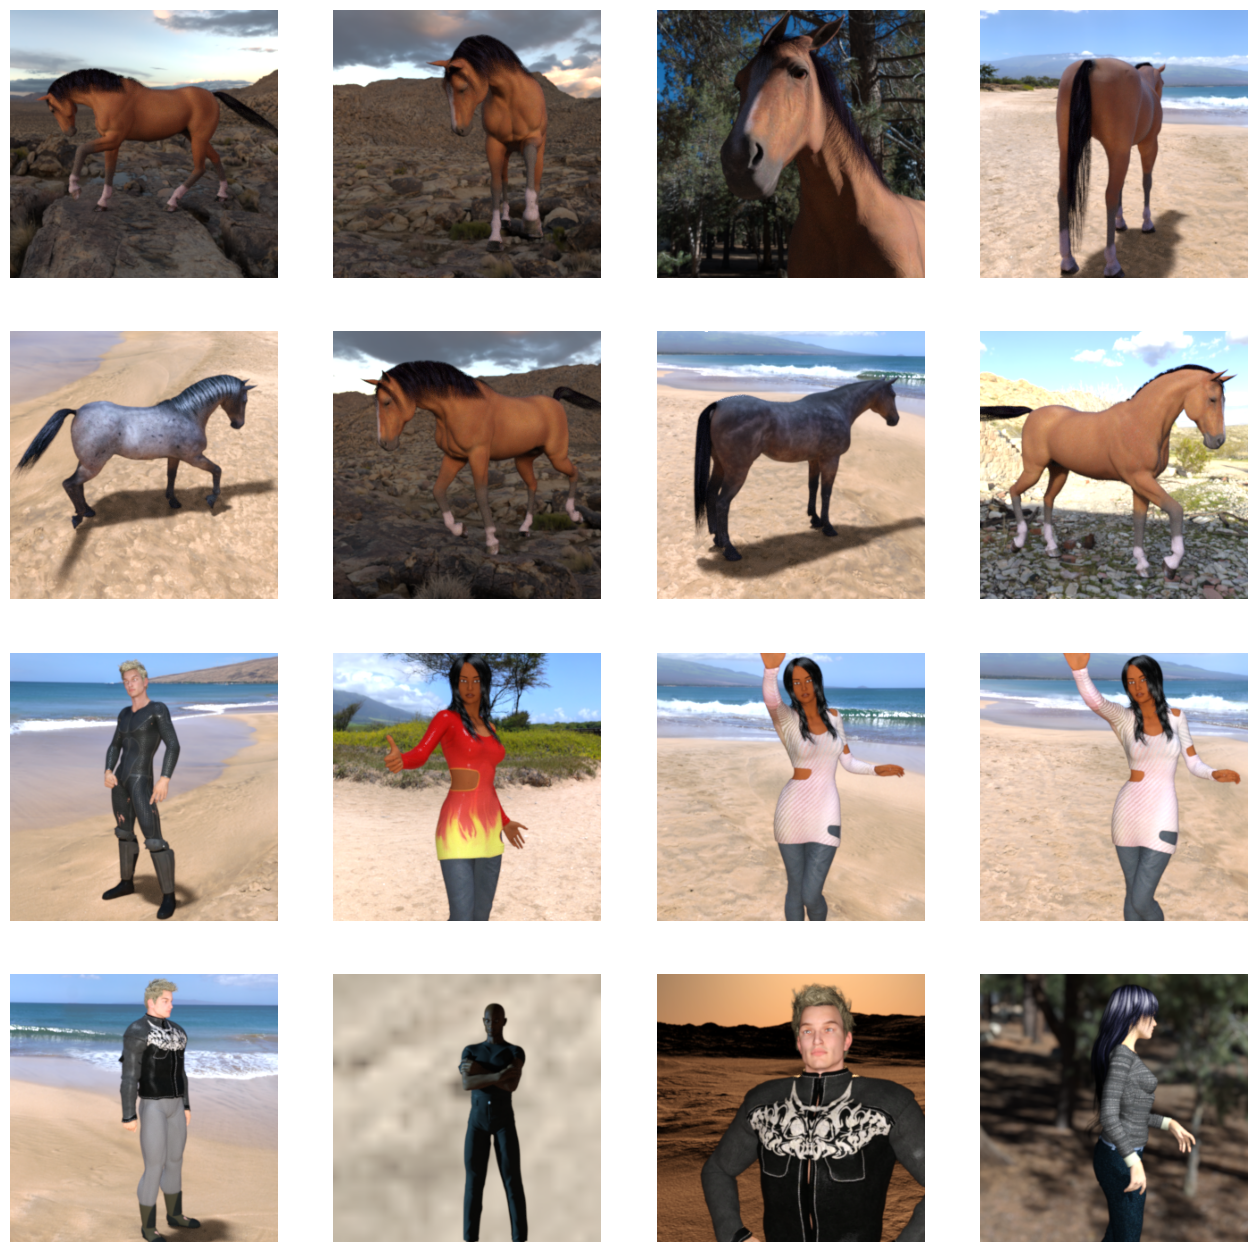

In [12]:
fig = plt.gcf()
fig.set_size_inches( ncols * 4, nrows * 4)

pic_index += 8

next_horse_pix = [ os.path.join( train_horse_dir, fname) for fname in train_horse_names[ pic_index - 8:pic_index]]
next_human_pix = [ os.path.join( train_human_dir, fname) for fname in train_human_names[ pic_index - 8:pic_index]]

for i, img_path in enumerate( next_horse_pix + next_human_pix):
    sp = plt.subplot( nrows, ncols, i + 1)
    sp.axis( "Off")

    img = mpimg.imread( img_path)
    plt.imshow( img)

plt.show()

In [13]:
model = tf.keras.models.Sequential( [
    tf.keras.layers.Conv2D( 16, ( 3, 3), activation="relu", input_shape=( 300, 300, 3)),
    tf.keras.layers.MaxPooling2D( 2, 2),
    tf.keras.layers.Conv2D( 32, ( 3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D( 2, 2),
    tf.keras.layers.Conv2D( 64, ( 3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D( 2, 2),
    tf.keras.layers.Conv2D( 64, ( 3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D( 2, 2),
    tf.keras.layers.Conv2D( 64, ( 3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D( 2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense( 512, activation="relu"),
    tf.keras.layers.Dense( 1, activation="sigmoid")
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 64)        0

In [16]:
model.compile(
    loss="binary_crossentropy",
    optimizer=RMSprop( learning_rate=0.001),
    metrics=[ "accuracy"]
)

In [17]:
train_datagen = ImageDataGenerator( rescale=1/255)
test_datagen = ImageDataGenerator( rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    "./horse-or-human",
    target_size=( 300, 300),
    batch_size=128,
    class_mode="binary"
)

test_generator = test_datagen.flow_from_directory(
    "./validation-horse-or-human",
    target_size=( 300, 300),
    batch_size=32,
    class_mode="binary"
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [18]:
history = model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=15,
    verbose=1,
    validation_data=test_generator,
    validation_steps=8
)

Epoch 1/15
8/8 [==============================] - 20s 1s/step - loss: 0.7343 - accuracy: 0.4917 - val_loss: 0.6653 - val_accuracy: 0.8438
Epoch 2/15
8/8 [==============================] - 9s 1s/step - loss: 0.6784 - accuracy: 0.5596 - val_loss: 0.6035 - val_accuracy: 0.5000
Epoch 3/15
8/8 [==============================] - 9s 1s/step - loss: 0.6137 - accuracy: 0.7375 - val_loss: 0.4967 - val_accuracy: 0.8555
Epoch 4/15
8/8 [==============================] - 9s 1s/step - loss: 0.5134 - accuracy: 0.7920 - val_loss: 0.3804 - val_accuracy: 0.8672
Epoch 5/15
8/8 [==============================] - 9s 1s/step - loss: 1.0847 - accuracy: 0.7653 - val_loss: 0.5219 - val_accuracy: 0.8125
Epoch 6/15
8/8 [==============================] - 9s 1s/step - loss: 0.2838 - accuracy: 0.8999 - val_loss: 0.8733 - val_accuracy: 0.8477
Epoch 7/15
8/8 [==============================] - 9s 1s/step - loss: 0.2247 - accuracy: 0.9032 - val_loss: 0.6960 - val_accuracy: 0.8672
Epoch 8/15
8/8 [========================

In [20]:
uploaded = files.upload()

for fn in uploaded.keys():

    path = f"/content/{ fn}"
    img = load_img( path, target_size=( 300, 300))
    x = img_to_array( img)
    x /= 255
    x = np.expand_dims( x, axis=0)

    images = np.vstack( [ x])

    classes = model.predict( images, batch_size=10)

    print( classes[ 0])

    if( classes[ 0] > 0.5):
        print( f"{ fn} is a human")
    else:
        print( f"{ fn} is a horse")

Saving 928188-che-guevara.jpg to 928188-che-guevara (1).jpg
1/1 [==============================] - 0s 426ms/step
[0.9999999]
928188-che-guevara (1).jpg is a human


1/1 [==============================] - 0s 110ms/step


<ipython-input-23-0d5c808e0d87>:33: RuntimeWarning: invalid value encountered in divide
  x /= x.std()


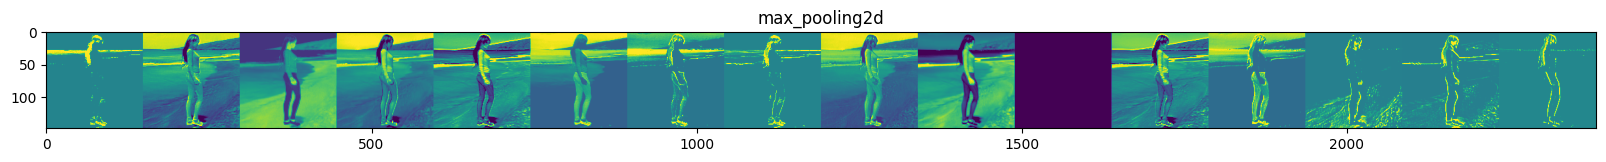

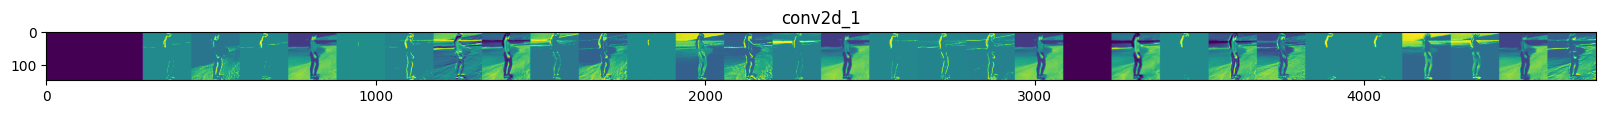

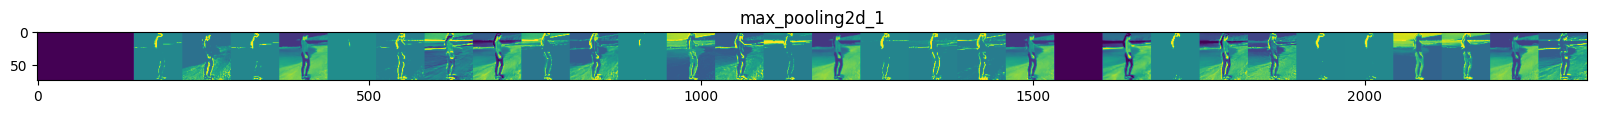

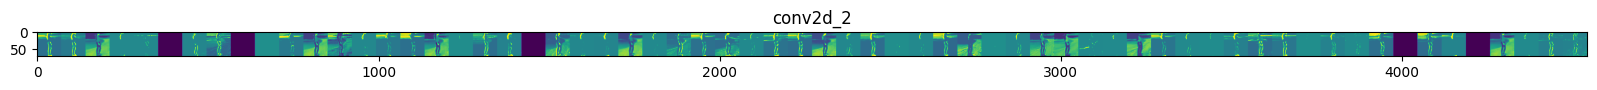

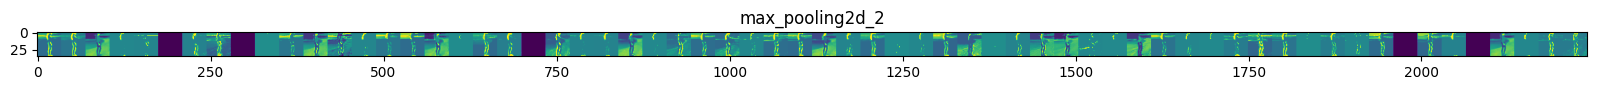

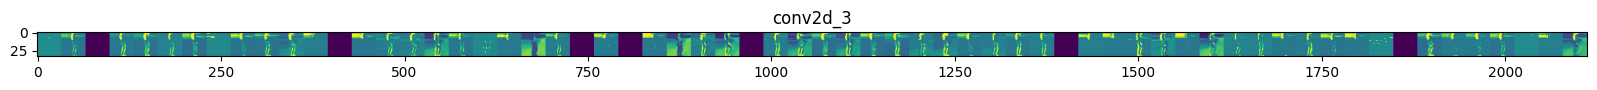

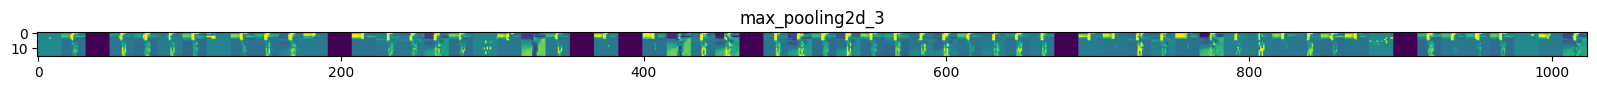

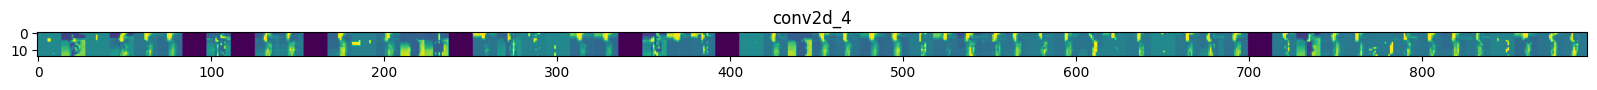

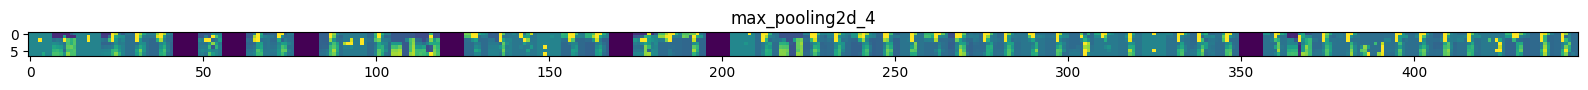

In [23]:
successive_outputs = [ layer.output for layer in model.layers[ 1:]]

visualization_model = tf.keras.models.Model(
    inputs=model.input,
    outputs=successive_outputs
)

horse_img_files = [ os.path.join( train_horse_dir, f) for f in train_horse_names]
human_img_files = [ os.path.join( train_human_dir, f) for f in train_human_names]

img_path = random.choice( horse_img_files + human_img_files)

img = load_img( img_path, target_size=( 300, 300))
x = img_to_array( img)
x = x.reshape( ( 1,) + x.shape)
x /= 255

successive_feature_maps = visualization_model.predict( x)

layer_names = [ layer.name for layer in model.layers[ 1:]]

for layer_name, feature_map in zip( layer_names, successive_feature_maps):
    if len( feature_map.shape) == 4:
        n_features = feature_map.shape[ -1]

        size = feature_map.shape[ 1]

        display_grid = np.zeros( ( size, size * n_features))

        for i in range( n_features):
            x = feature_map[ 0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip( x, 0, 255).astype( "uint8")

            display_grid[ :, i * size:( i + 1) * size] = x

        scale = 20. / n_features
        plt.figure( figsize=( scale * n_features, scale))
        plt.title( layer_name)
        plt.grid( False)
        plt.imshow( display_grid, aspect="auto", cmap="viridis")